In [13]:
# feel free to add more
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('C:/Data/garments_worker_productivity.csv')

In [3]:
# Check which variable contains missing values
print(df.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [4]:
# Since about 50% of the observations in wip are missing, we may consider delete this variable, but feel free to use other treatments.
df = df.drop(['wip'], axis = 1)
# Since workday and quarter area already captured in different features, we can probably delete date
df = df.drop(['date'], axis = 1)
# The variable idle_men seems to contain little information that is not already captured by idle time
df = df.drop(['idle_men'], axis = 1)
# Idle time is mostly 0 - thus dichotomizing it makes sense
df['idle_time'] = df['idle_time'].apply(lambda x: 1 if x > 0 else x)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   over_time              1197 non-null   int64  
 7   incentive              1197 non-null   int64  
 8   idle_time              1197 non-null   float64
 9   no_of_style_change     1197 non-null   int64  
 10  no_of_workers          1197 non-null   float64
 11  actual_productivity    1197 non-null   float64
dtypes: float64(5), int64(4), object(3)
memory usage: 112.3+ KB


In [6]:
#I made team a category (even though its a number), same with targets and changes
cat_cols = ['quarter', 'department', 'day', 'team', 'targeted_productivity', 'no_of_style_change']
num_cols = ['smv', 'over_time', 'incentive', 'no_of_workers']
#One hot encoding, dropping the first category
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
#Standardizing all features (not the labels)
scaler= StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [7]:
#Define Xs and ys
X = df.drop('actual_productivity', axis=1)
y = df['actual_productivity']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

MAE: 0.08706341140000001
MSE: 0.025711880678394076
RMSE: 0.16034924595517772
R-squared: 0.13972735274848402


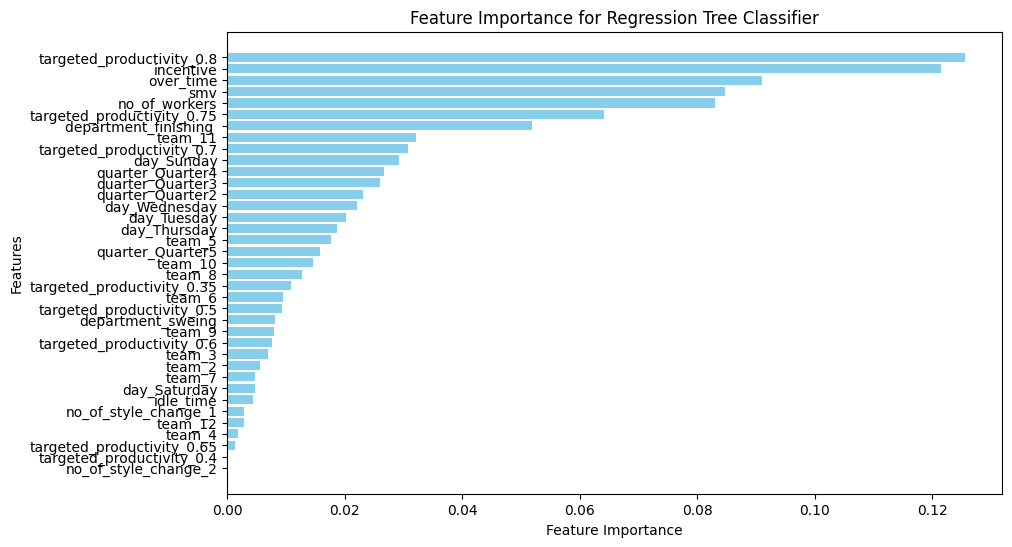

In [10]:
# Train a regression tree
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train, y_train)

y_pred = reg_tree.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

# Extract feature importance
feature_importance = reg_tree.feature_importances_

def plot_feature_importance(importances, feature_names):
    # Convert feature importance into a pandas DataFrame for better handling
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Sort by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance for Regression Tree Classifier')
    plt.gca().invert_yaxis()
    plt.show()

# Step 7: Plot feature importance using actual feature names from the DataFrame
plot_feature_importance(feature_importance, X.columns)

In [12]:
tree_xgboost = XGBRegressor(random_state=42)

# Fit the model on the training data
tree_xgboost.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_xgboost.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 0.0840538911298684
MSE: 0.01866628763679414
RMSE: 0.13662462309845227
R-squared: 0.37546004975214053


In [15]:
model_lgbm = lgb.LGBMRegressor(random_state=42, verbose=-1)

# Fit the model on the training data
model_lgbm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_lgbm.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 0.08668082104366784
MSE: 0.01844745190803159
RMSE: 0.13582139709203256
R-squared: 0.38278189423526177
